In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
%matplotlib inline
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
mpg = sns.load_dataset("mpg").dropna()
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [3]:
mpg.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration  model_year  
mpg               0.423329    0.580541  
cylinders        -0.504683   -0.345647  
displacement     -0.543800   -0.369855  
horsepower       -0.689196   -0.416361  
weight           -0.416839   -0.309120  
acceleration      1.000000    0.290316  
model_year        0.290316    1.000000

<AxesSubplot:>

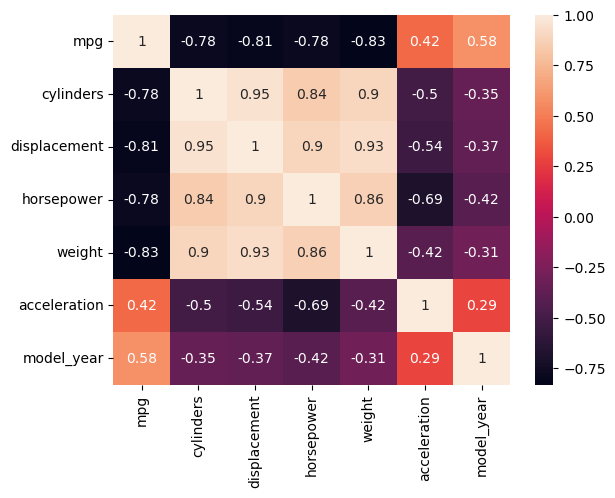

In [4]:
sns.heatmap(mpg.corr(), annot = True)

In [5]:
print('R-squared = ', (mpg.corr()['weight']['horsepower'])**2)

R-squared =  0.7474254996898221


In [6]:
mpg.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
mpg.describe().applymap(lambda x: round(x))

mpg  cylinders  displacement  horsepower  weight  acceleration  \
count  392        392           392         392     392           392   
mean    23          5           194         104    2978            16   
std      8          2           105          38     849             3   
min      9          3            68          46    1613             8   
25%     17          4           105          75    2225            14   
50%     23          4           151          94    2804            16   
75%     29          8           276         126    3615            17   
max     47          8           455         230    5140            25   

       model_year  
count         392  
mean           76  
std             4  
min            70  
25%            73  
50%            76  
75%            79  
max            82

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

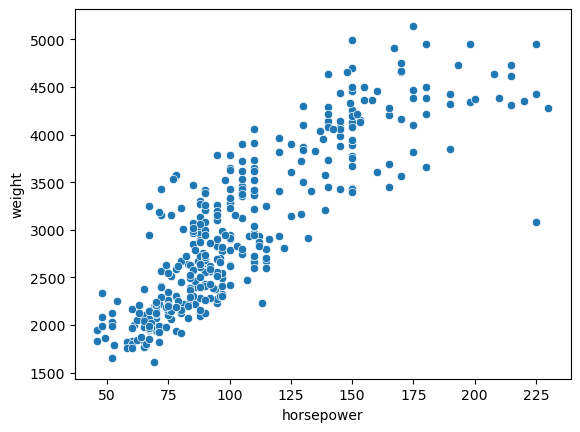

In [8]:
sns.scatterplot(x='horsepower', y='weight', data = mpg)

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

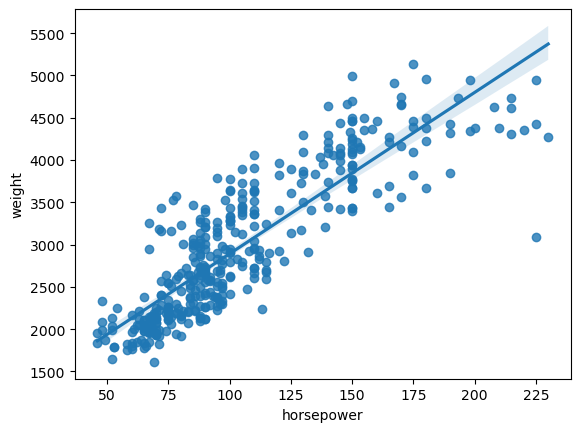

In [9]:
sns.regplot(x='horsepower', y='weight', data = mpg, ci =95)

In [10]:
import statsmodels.api as sm

In [11]:
Y = mpg['weight']
X = mpg['horsepower']
model = sm.OLS(Y,X).fit()
model.predict(X)
model

In [12]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'weight ~ horsepower', data = mpg).fit()
model

In [13]:
print(model.params)

Intercept     984.500327
horsepower     19.078162
dtype: float64


In [14]:
model.rsquared

0.7474254996898199

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          1.36e-118
Time:                        10:28:30   Log-Likelihood:                -2929.9
No. Observations:                 392   AIC:                             5864.
Df Residuals:                     390   BIC:                             5872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    984.5003     62.514     15.748      0.0

std err (b1) = std err(weights/horsepower) = 1/sqrt(N) * stddev(residuals)/stddev(horsepower)

In [16]:
N = 390
residuals = model.predict(mpg['horsepower']) - mpg['weight'] #model.predict(mpg['horsepower']) is the predicted weight
residuals.std()/mpg.horsepower.std() * 1/(N)**0.5

0.5615843732511712

In [17]:
predicted_weights = model.predict(mpg['horsepower'])
predicted_weights

0      3464.661329
1      4132.396983
2      3846.224560
3      3846.224560
4      3655.442944
          ...     
393    2625.222220
394    1976.564728
395    2587.065897
396    2491.675089
397    2548.909574
Length: 392, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

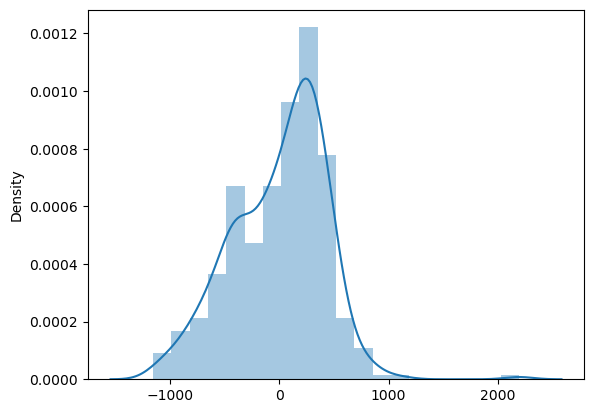

In [18]:
sns.distplot(residuals)

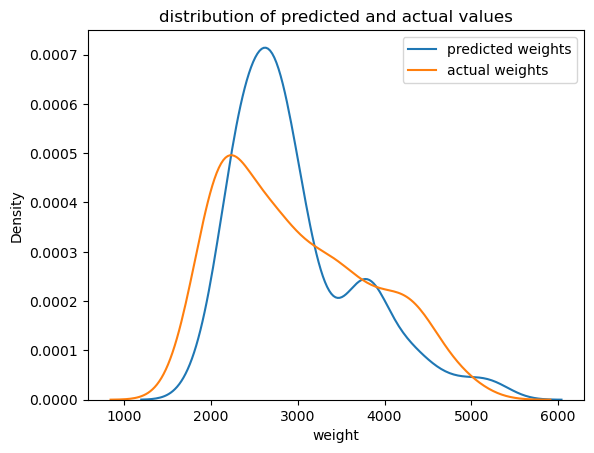

In [19]:
sns.kdeplot(predicted_weights, label='predicted weights')
sns.kdeplot(mpg['weight'], label = 'actual weights')
plt.title('distribution of predicted and actual values')
plt.legend()

In [20]:
from importlib import reload
plt=reload(plt)

Text(0, 0.5, 'residual weights')

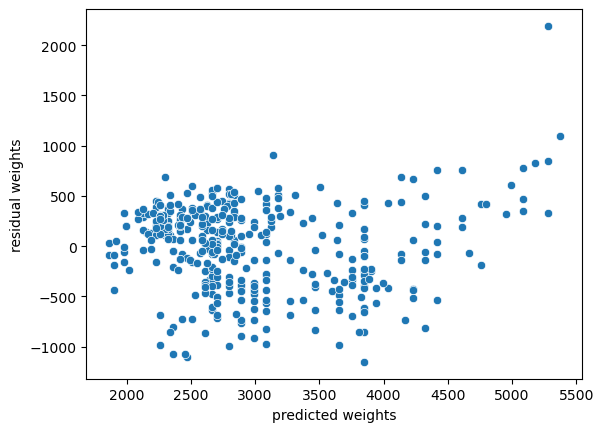

In [21]:
sns.scatterplot(x = predicted_weights, y= residuals)
plt.xlabel('predicted weights')
plt.ylabel('residual weights')

### Multivariate Linear Regression

In [22]:
model2 = smf.ols(formula = 'weight ~ horsepower + cylinders', data = mpg).fit()
model2.rsquared

0.8458154043882244

In [23]:
print(model2.params)

Intercept     528.876711
horsepower      8.231070
cylinders     290.356425
dtype: float64


In [24]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1067.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          1.19e-158
Time:                        10:28:36   Log-Likelihood:                -2833.1
No. Observations:                 392   AIC:                             5672.
Df Residuals:                     389   BIC:                             5684.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    528.8767     56.816      9.309      0.0

eval_env: 1
eval_env: 1
eval_env: 1


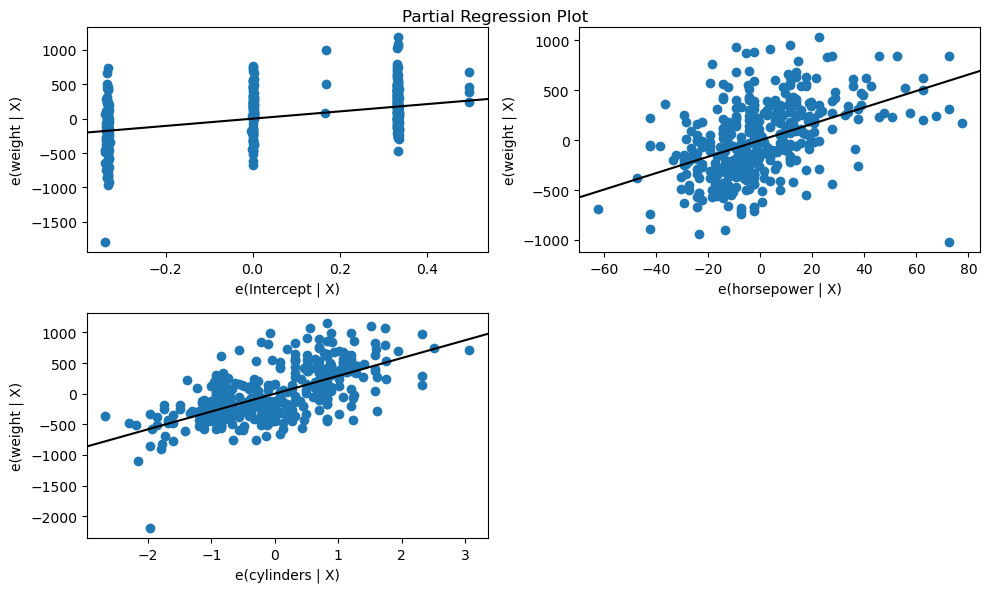

In [25]:
import statsmodels.api as sm
fig= plt.figure(figsize = (10,6))
fig = sm.graphics.plot_partregress_grid(model2, fig = fig)

### Categorical Features

In [26]:
mpg['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [27]:
model3 = smf.ols(formula = 'weight ~ C(origin)', data = mpg).fit()
model3.rsquared
model3.params

Intercept             2433.470588
C(origin)[T.japan]    -212.242740
C(origin)[T.usa]       939.019208
dtype: float64

In [28]:
mpg.groupby('origin').sum('weight')

mpg  cylinders  displacement  horsepower  weight  acceleration  \
origin                                                                      
europe  1877.0        283        7455.0      5478.0  165476        1142.0   
japan   2405.6        324        8114.0      6307.0  175477        1277.6   
usa     4908.2       1538       60640.5     29167.0  826260        3672.6   

        model_year  
origin              
europe        5146  
japan         6118  
usa          18520

In [29]:
mpg.groupby('origin').agg({'weight': 'mean'})

weight
origin             
europe  2433.470588
japan   2221.227848
usa     3372.489796

In [30]:
#To remove intercept from our regression 
model3 = smf.ols(formula = 'weight ~ C(origin) - 1', data = mpg).fit()
model3.params

C(origin)[europe]    2433.470588
C(origin)[japan]     2221.227848
C(origin)[usa]       3372.489796
dtype: float64

In [31]:
model3.rsquared

0.3670104142632351

In [32]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     112.8
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.35e-39
Time:                        10:28:41   Log-Likelihood:                -3109.9
No. Observations:                 392   AIC:                             6226.
Df Residuals:                     389   BIC:                             6238.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(origin)[europe]  2433.4706     82.16

### Multivariate Regression

In [33]:
### Model 4

In [34]:
features= ['mpg','cylinders','displacement','horsepower','acceleration','model_year']

In [35]:
mpg_standardized = mpg.copy()
for i in features:
    mu= mpg[i].mean()
    sigma=mpg[i].std()
    mpg_standardized[i] = mpg[i].map(lambda x: (x - mu) / sigma)
mpg_standardized

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   -0.697747   1.482053      1.075915    0.663285    3504     -1.283618   
1   -1.082115   1.482053      1.486832    1.572585    3693     -1.464852   
2   -0.697747   1.482053      1.181033    1.182885    3436     -1.646086   
3   -0.953992   1.482053      1.047246    1.182885    3433     -1.283618   
4   -0.825870   1.482053      1.028134    0.923085    3449     -1.827320   
..        ...        ...           ...         ...     ...           ...   
393  0.455359  -0.862911     -0.519972   -0.479835    2790      0.021267   
394  2.633448  -0.862911     -0.930889   -1.363154    2130      3.283479   
395  1.095974  -0.862911     -0.567753   -0.531795    2295     -1.428605   
396  0.583482  -0.862911     -0.711097   -0.661694    2625      1.108671   
397  0.967851  -0.862911     -0.720653   -0.583754    2720      1.398646   

     model_year  origin                       name  
0     -1.623241     usa  chevrolet chevelle malibu  
1     -1.623241     usa          buick skylark 320  
2     -1.623241     usa         plymouth satellite  
3     -1.623241     usa              amc rebel sst  
4     -1.623241     usa                ford torino  
..          ...     ...                        ...  
393    1.634321     usa            ford mustang gl  
394    1.634321  europe                  vw pickup  
395    1.634321     usa              dodge rampage  
396    1.634321     usa                ford ranger  
397    1.634321     usa                 chevy s-10  

[392 rows x 9 columns]

In [36]:
formula = 'weight ~' + '+' .join(features)

In [37]:
model4 = smf.ols(formula=formula, data=mpg).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     808.4
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          1.03e-214
Time:                        10:28:46   Log-Likelihood:                -2688.0
No. Observations:                 392   AIC:                             5390.
Df Residuals:                     385   BIC:                             5418.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1549.0190    316.068     -4.901   

In [38]:
print(model4.params)

Intercept      -1549.019027
mpg              -31.024938
cylinders         36.297050
displacement       4.058404
horsepower         7.265625
acceleration      60.631868
model_year        33.759837
dtype: float64


In [39]:
model4.rsquared

0.926460967860915

In [40]:
predicted_weightsm4= model4.predict(mpg[features])
predicted_weightsm4

0      3464.140844
1      3955.707986
2      3593.463927
3      3659.328014
4      3456.582213
          ...     
393    2665.679974
394    2262.400196
395    2233.204539
396    2684.523180
397    2657.692331
Length: 392, dtype: float64

<AxesSubplot:>

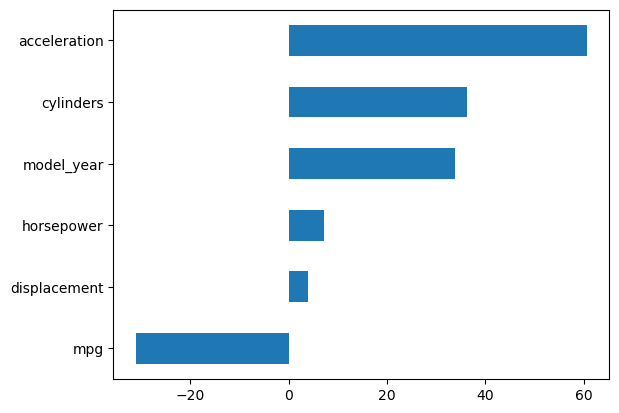

In [41]:
model4.params[1:].sort_values().plot(kind='barh')

In [42]:
residuals4 = predicted_weightsm4 - mpg.weight
residuals4

0      -39.859156
1      262.707986
2      157.463927
3      226.328014
4        7.582213
          ...    
393   -124.320026
394    132.400196
395    -61.795461
396     59.523180
397    -62.307669
Length: 392, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

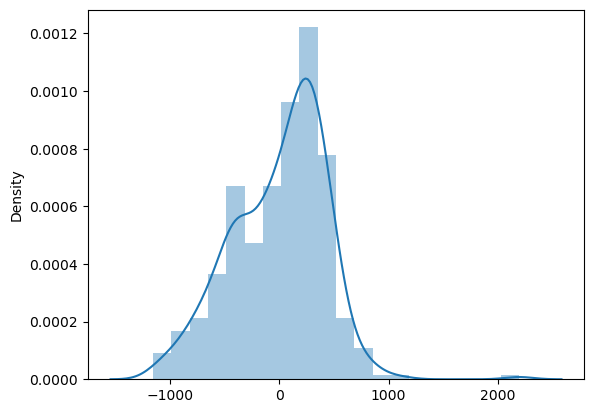

In [43]:
sns.distplot(residuals)

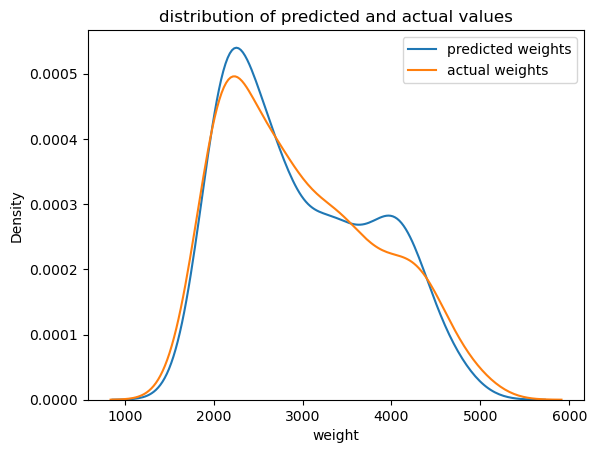

In [44]:
sns.kdeplot(predicted_weightsm4, label='predicted weights')
sns.kdeplot(mpg['weight'], label = 'actual weights')
plt.title('distribution of predicted and actual values')
plt.legend()